In [9]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

In [10]:
load_dotenv(override=True)

True

In [11]:
nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [12]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

In [13]:
graph_builder = StateGraph(State)


In [14]:
def our_first_node(old_state: State) -> State:
    reply = f'{random.choice(nouns)} are {random.choice(adjectives)}'
    messages = [{'role': 'assistant', 'content': reply}]
    new_state = State(messages=messages)
    return new_state

graph_builder.add_node('first_node', our_first_node)

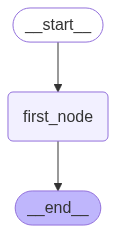

In [15]:
graph_builder.add_edge(START, 'first_node')
graph_builder.add_edge('first_node', END)

graph_builder.compile()

In [16]:
def chat(user_input:str, history):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print (result)
    return result['messages'][-1].content

gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


In [17]:
class State(BaseModel):
    messages : Annotated[list,add_messages]

In [18]:
llm = ChatOpenAI(model='gpt-4o-mini')

In [19]:
def chatbot(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages = [response])
    return new_state    

In [20]:
graph_builder = StateGraph(State)
graph_builder.add_node('chatbot', chatbot)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)
graph =graph_builder.compile()

In [21]:
def chat(user_input:str, history):
    initial_state = State(messages = [{"role":"user", "content": user_input}])
    result = graph.invoke(initial_state)
    print (result)
    return result['messages'][-1].content

In [22]:
gr.ChatInterface(fn=chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='26896558-47a6-4f6c-a1b3-fda2d7682a49'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BgZaZklu8TlvnBsQcpwdi1pEKWjNR', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8861ba7c-1537-48fd-bd80-68c249d3d752-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
